In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Data=pd.read_csv("match.csv")

C:\Users\Ganesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Data["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [4]:
a=Data["venue"]
for i in range(len(a)):
    if a[i]=="M.Chinnaswamy Stadium":
        a[i] = "M Chinnaswamy Stadium"
    elif a[i]=="MA Chidambaram Stadium, Chepauk, Chennai":
        a[i]="MA Chidambaram Stadium"
    elif a[i]=="MA Chidambaram Stadium, Chepauk":
        a[i]="MA Chidambaram Stadium"
    elif a[i]=="Wankhede Stadium, Mumbai":
        a[i]="Wankhede Stadium"
        
        
a

C:\Users\Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is

0          M Chinnaswamy Stadium
1          M Chinnaswamy Stadium
2          M Chinnaswamy Stadium
3          M Chinnaswamy Stadium
4          M Chinnaswamy Stadium
5          M Chinnaswamy Stadium
6          M Chinnaswamy Stadium
7          M Chinnaswamy Stadium
8          M Chinnaswamy Stadium
9          M Chinnaswamy Stadium
10         M Chinnaswamy Stadium
11         M Chinnaswamy Stadium
12         M Chinnaswamy Stadium
13         M Chinnaswamy Stadium
14         M Chinnaswamy Stadium
15         M Chinnaswamy Stadium
16         M Chinnaswamy Stadium
17         M Chinnaswamy Stadium
18         M Chinnaswamy Stadium
19         M Chinnaswamy Stadium
20         M Chinnaswamy Stadium
21         M Chinnaswamy Stadium
22         M Chinnaswamy Stadium
23         M Chinnaswamy Stadium
24         M Chinnaswamy Stadium
25         M Chinnaswamy Stadium
26         M Chinnaswamy Stadium
27         M Chinnaswamy Stadium
28         M Chinnaswamy Stadium
29         M Chinnaswamy Stadium
          

In [109]:
len(Data)

194354

In [110]:
Data["venue"]=a

In [128]:
Data["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
 

In [5]:
def venue(Data,venue):
    stadium=Data[Data["venue"]==venue]
    fst_inngs= stadium[ stadium["innings"]==1]
    sc_inngs=stadium[ stadium["innings"]==2]
    first_in=fst_inngs.groupby(["match_id"]).sum()["runs_off_bat"]
    second_in=sc_inngs.groupby(["match_id"]).sum()["runs_off_bat"]
    first=first_in.reset_index()
    second=second_in.reset_index()
    first=first.drop(["match_id"],axis=1)
    second=second.drop(["match_id"],axis=1)
    return first,second

In [6]:
first,second=venue(Data,"M Chinnaswamy Stadium")

In [7]:
def line_plot(first,second,venue):
    plt.figure(figsize=(20,10))
    plt.plot(first,label="First Innings")
    plt.plot(second,label="Second Innings")
    plt.title(venue)
    plt.legend()

    

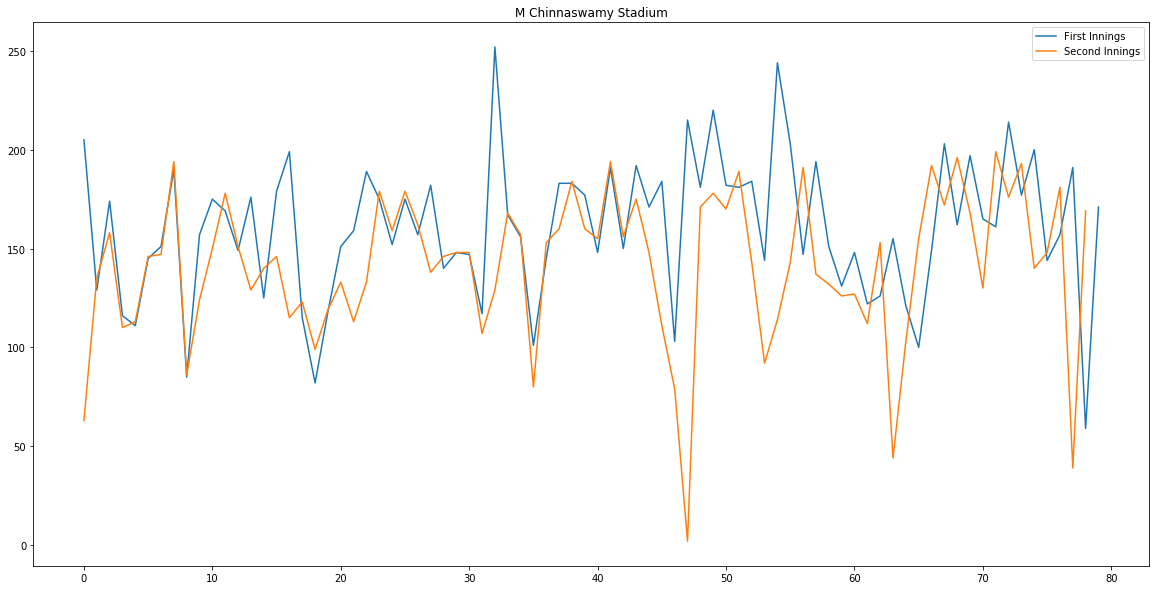

In [8]:
line_plot(first,second,"M Chinnaswamy Stadium")

In [9]:
def bar_chart(first,second,venue):
    a=[]
    b=[]
    
    for i,j in zip(first.values,second.values):
        for k,l in zip(i,j):
            a.append(k)
            b.append(l)
    plt.figure(figsize=(20,10))       
    plt.bar(np.arange(len(a)),a,label="First Innings")
    plt.bar(np.arange(len(a)),b,label="Second Innings")
    plt.title(venue)
    plt.legend()

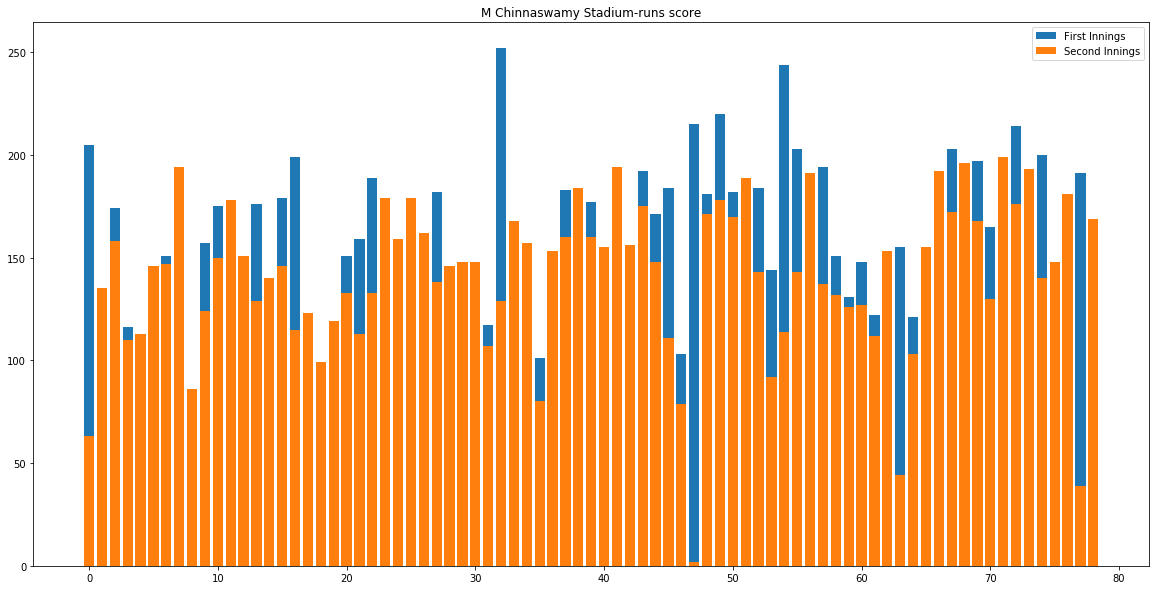

In [10]:
bar_chart(first,second,"M Chinnaswamy Stadium-runs score")

In [11]:
def win_bar(first,second,venue):
    batfirstwin=0
    batscnwin=0
    for i in range(len(first)):
        if first[i:i+1].values>second[i:i+1].values:
            batfirstwin +=1
        else:
            batscnwin +=1
    plt.figure(figsize=(20,10))
    plt.bar(["First batting","Second Batting"],[batfirstwin,batscnwin])
    plt.title(venue)
    plt.legend()
    total=batfirstwin+batscnwin
    firstwin=(batfirstwin/total)*100
    secondwin=(batscnwin/total)*100
    print("First batting {:.2f} %".format(firstwin))
    print("Second batting  {:.2f} %".format(secondwin))
        
    

    
            

C:\Users\Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
No handles with labels found to put in legend.


First batting 53.75 %
Second batting  46.25 %


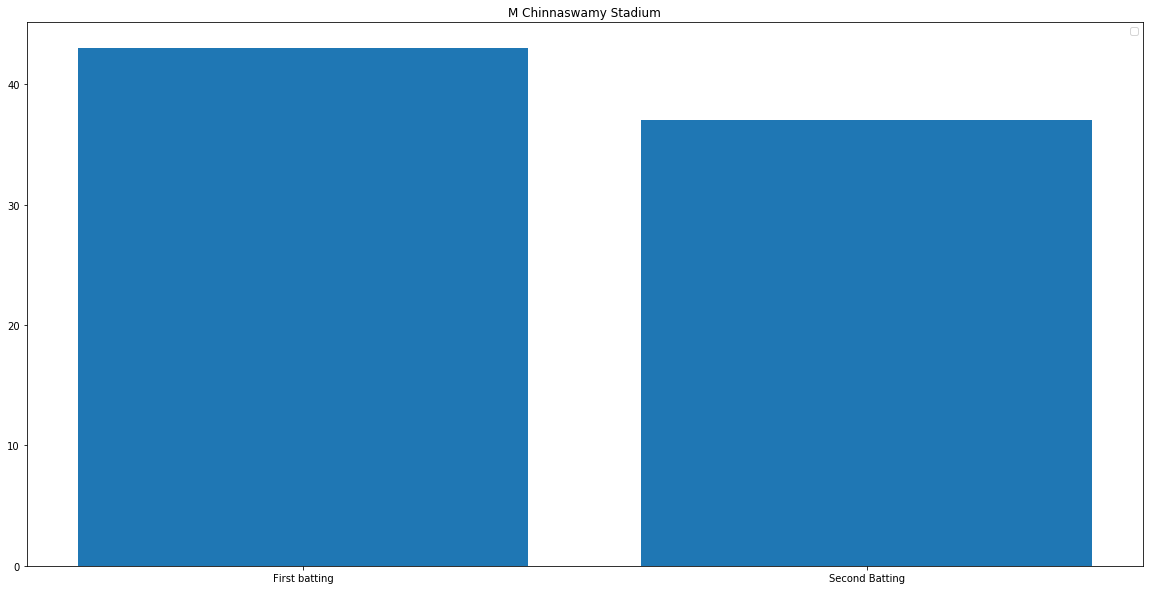

In [12]:
win_bar(first,second,"M Chinnaswamy Stadium")

No handles with labels found to put in legend.


First batting 71.19 %
Second batting  28.81 %


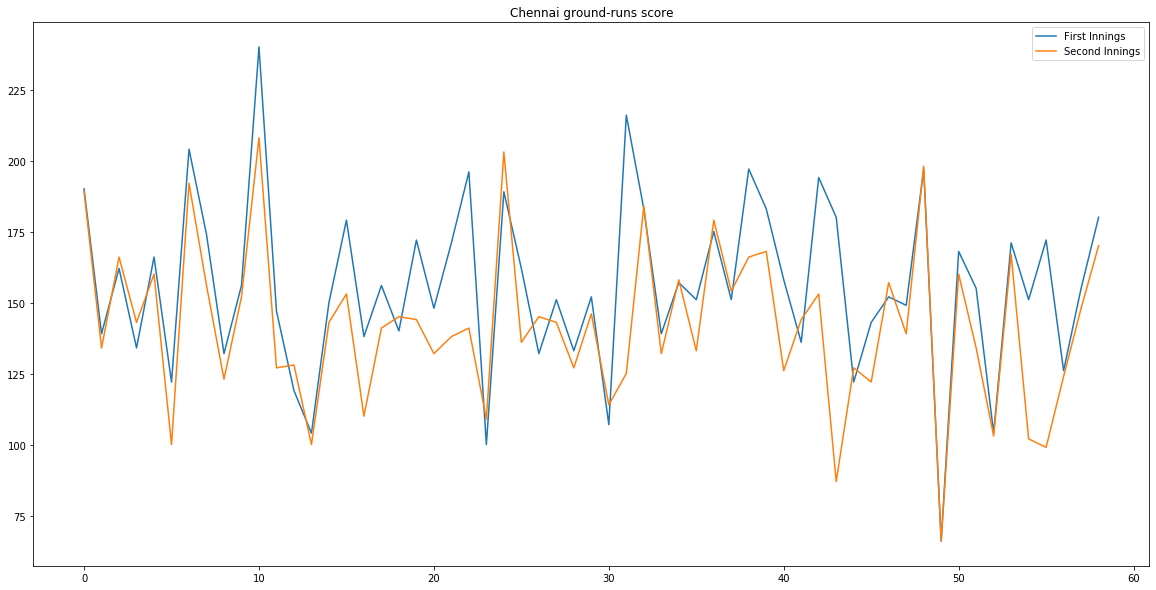

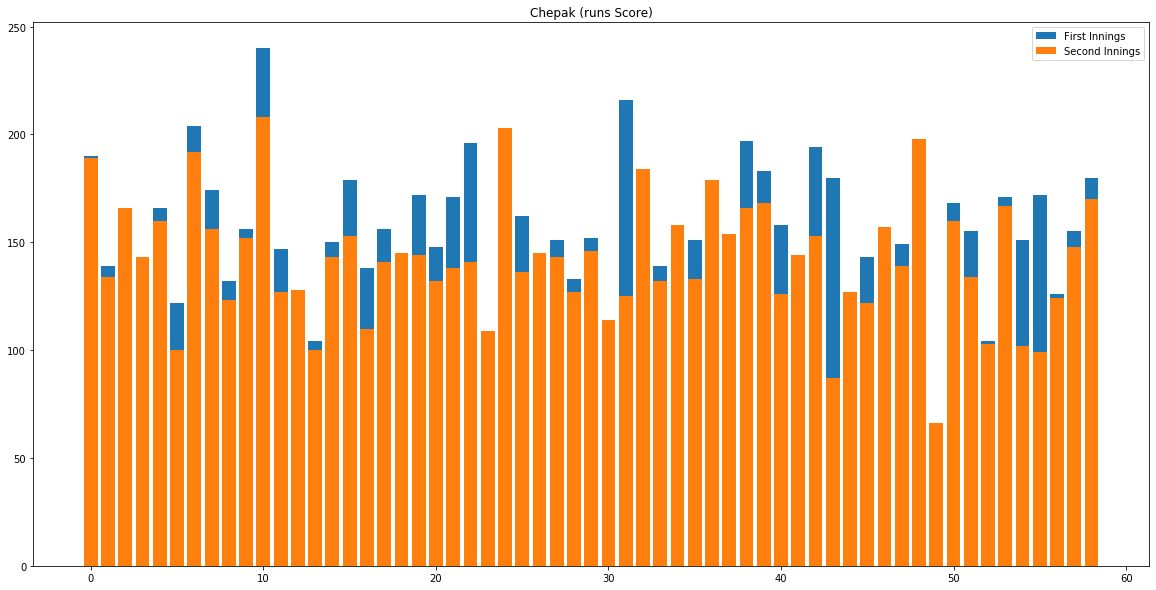

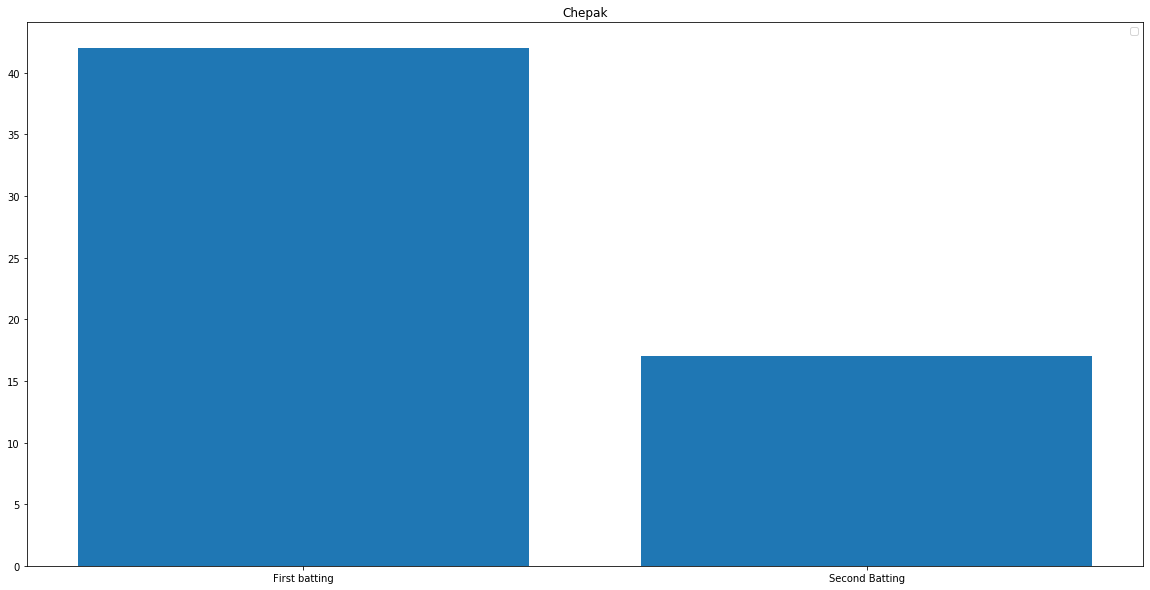

In [13]:
first,second=venue(Data,"MA Chidambaram Stadium")
line_plot(first,second,"Chennai ground-runs score")
bar_chart(first,second,"Chepak (runs Score)")
win_bar(first,second,"Chepak")

C:\Users\Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
No handles with labels found to put in legend.


First batting 53.75 %
Second batting  46.25 %


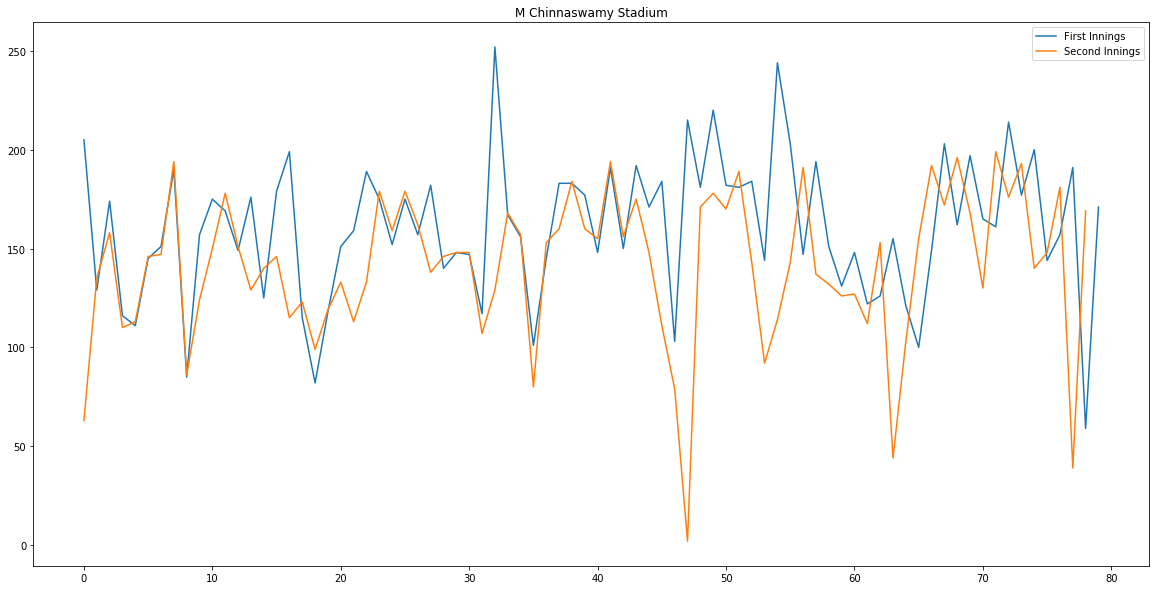

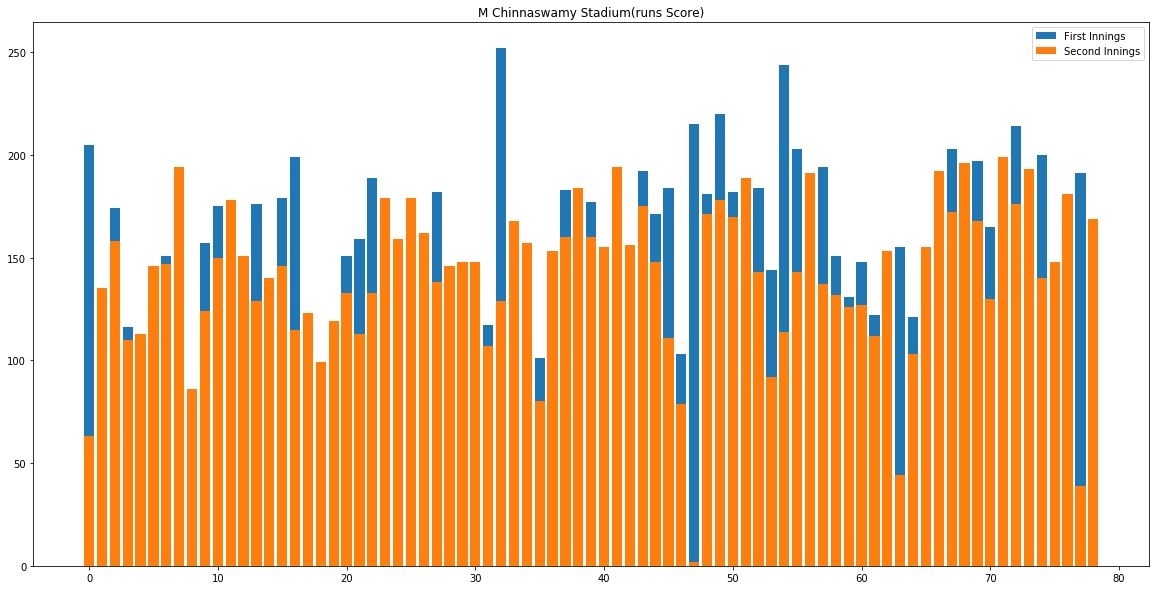

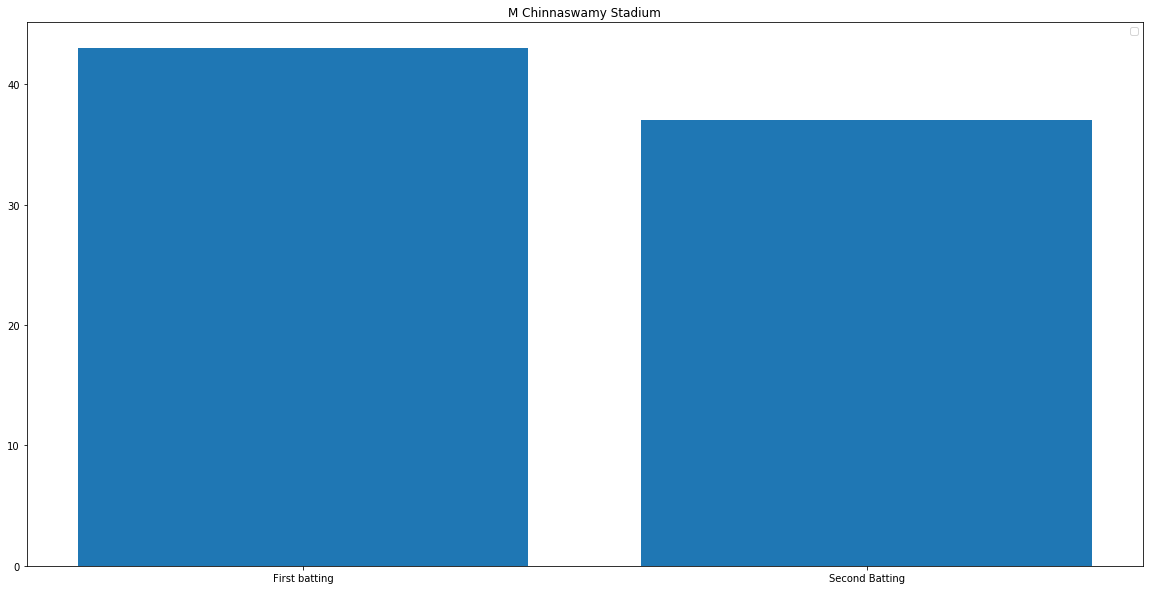

In [14]:
first,second=venue(Data,"M Chinnaswamy Stadium")
line_plot(first,second,"M Chinnaswamy Stadium")
bar_chart(first,second,"M Chinnaswamy Stadium(runs Score)")
win_bar(first,second,"M Chinnaswamy Stadium")

No handles with labels found to put in legend.


First batting 59.46 %
Second batting  40.54 %


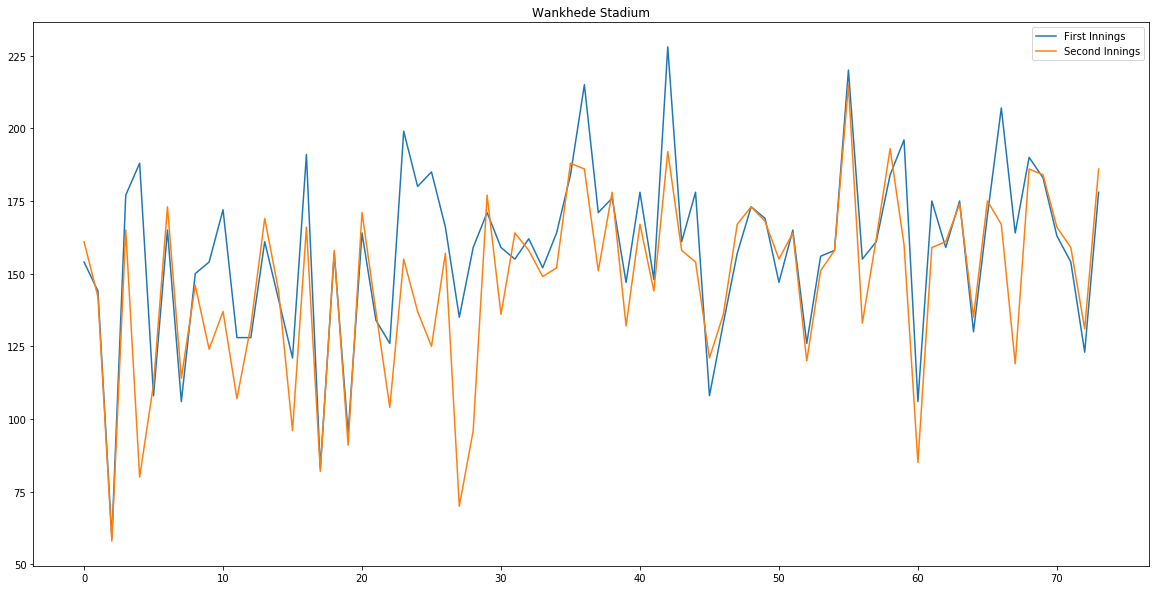

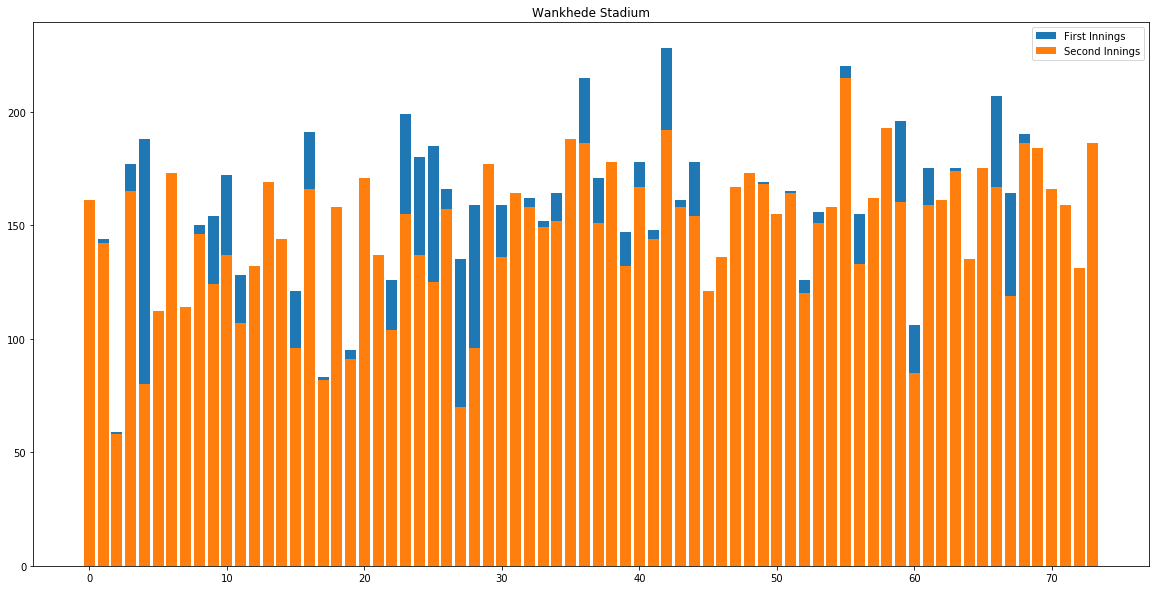

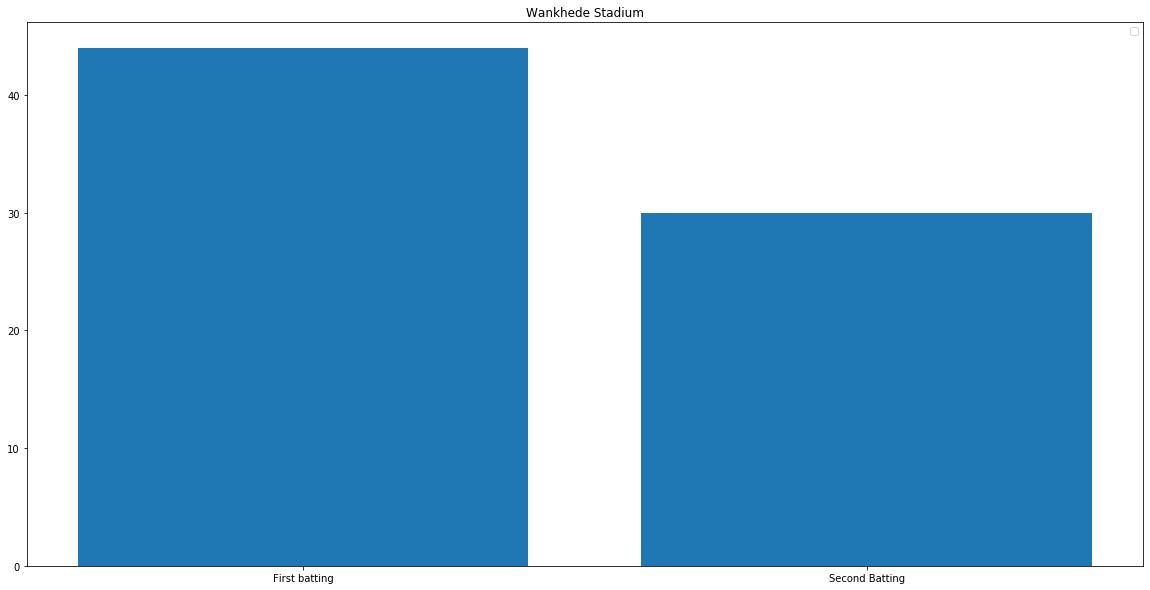

In [22]:

first,second=venue(Data,"Wankhede Stadium")
line_plot(first,second,"Wankhede Stadium")
bar_chart(first,second,"Wankhede Stadium")
win_bar(first,second,"Wankhede Stadium")

In [24]:
first.sum()+second.sum()

runs_off_bat    22522
dtype: int64

In [21]:
first.sum()/len(first)

runs_off_bat    157.621622
second          146.729730
dtype: float64